In [136]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

In [156]:
with open("output.txt") as read:
    read.readline()
    a = read.readline()
    a = a.split()
    lenght_x = float(a[2])
    a = read.readline()
    a = a.split()
    lenght_y = float(a[2])
    a = read.readline()
    a = a.split()
    dimensional = int(a[2])
    read.readline()
    a = read.readline()
    a = a.split()
    position_x = float(a[2])
    a = read.readline()
    a = a.split()
    position_y = float(a[2])
    a = read.readline()
    a = a.split()
    charge_value = float(a[2])
    
    for line in read:
        if line == "Data:\n":
            a = read.readline()

In [112]:
a

'0.449438 0.457614 0.465983 0.474552 0.483325 0.492308 0.501505 0.510921 0.520562 0.530434 0.540541 0.550888 0.561482 0.572328 0.583431 0.594796 0.606428 0.618334 0.630517 0.642983 0.655738 0.668784 0.682128 0.695773 0.709723 0.723982 0.738552 0.753438 0.76864 0.78416 0.8 0.81616 0.832639 0.849437 0.866551 0.883978 0.901713 0.919752 0.938086 0.956709 0.97561 0.994777 1.0142 1.03386 1.05374 1.07383 1.09409 1.11452 1.13507 1.15574 1.17647 1.19725 1.21803 1.23877 1.25945 1.28 1.30039 1.32057 1.34048 1.36008 1.37931 1.39811 1.41643 1.43421 1.45138 1.46789 1.48368 1.49869 1.51286 1.52614 1.53846 1.54979 1.56006 1.56924 1.57729 1.58416 1.58983 1.59426 1.59744 1.59936 1.6 1.59936 1.59744 1.59426 1.58983 1.58416 1.57729 1.56924 1.56006 1.54979 1.53846 1.52614 1.51286 1.49869 1.48368 1.46789 1.45138 1.43421 1.41643 1.39811 0.454494 0.462856 0.47142 0.480192 0.489177 0.49838 0.507808 0.517464 0.527357 0.53749 0.54787 0.558503 0.569395 0.580552 0.591979 0.603682 0.615669 0.627943 0.640512 0.65338

In [ ]:
a = a.split()

data = np.zeros((dimensional, dimensional), float)

for i, value in enumerate(a):
    a[i] = float(value)

i = 0
j = 0
for k, value in enumerate(a):
    i = int(k%dimensional)
    j = int(k/dimensional)
    data[i][j] = float(value)


X = np.linspace(0, lenght_x, dimensional)
Y = np.linspace(0, lenght_y, dimensional)

plt.figure()


plt.title("Electric field strength")
plt.xlabel('X')
plt.ylabel('Y')
plt.contourf(X, Y, data, 100)

# plt.subplot(212)
# plt.title("Electric field strength")
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.contour(X,Y, data, 100, corner_mask = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


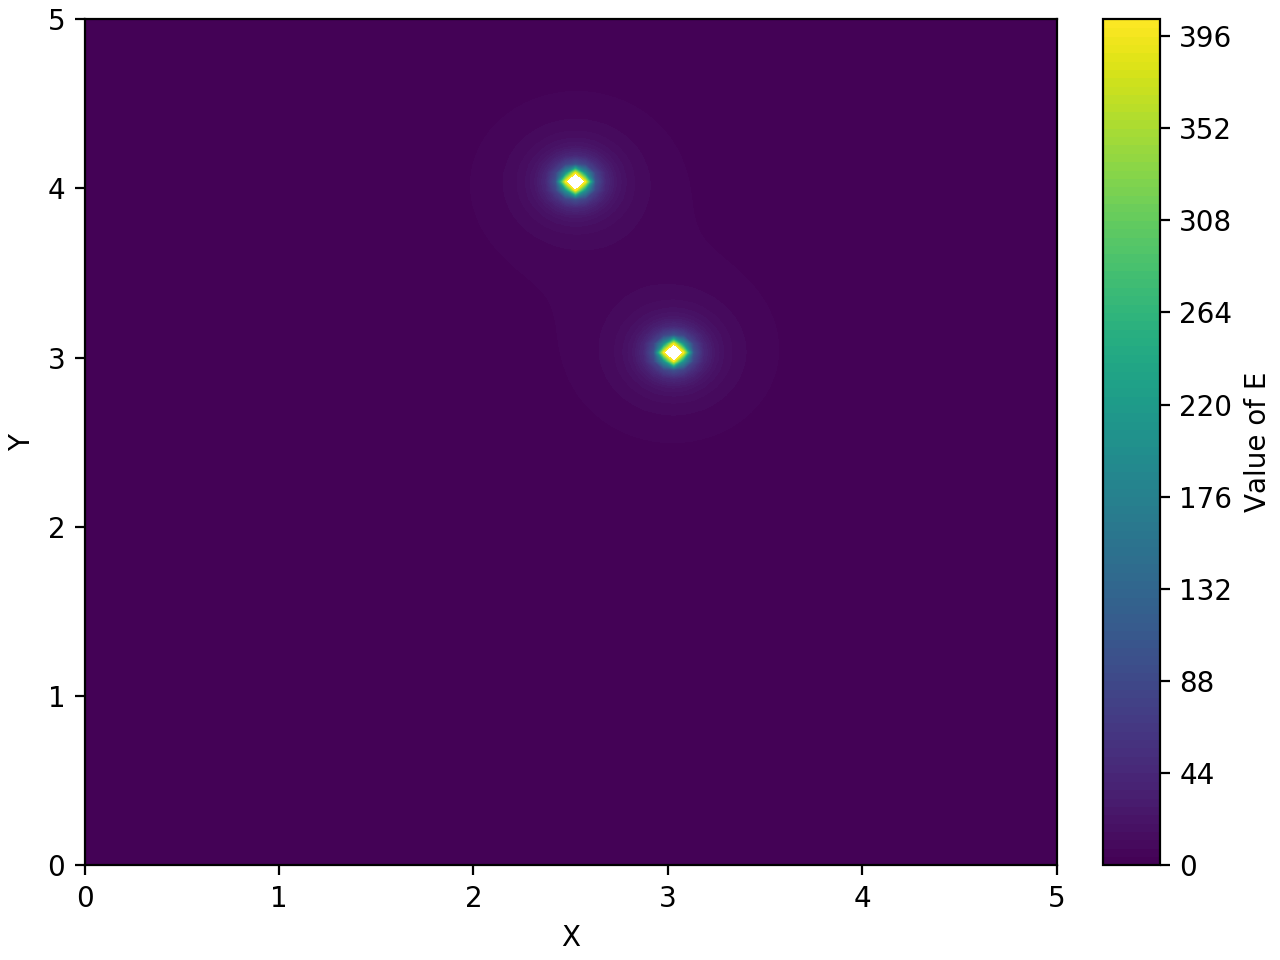

Text(0, 0.5, 'Value of E')

In [142]:
fig, ax = plt.subplots(constrained_layout = True)
CS = ax.contourf(X,Y, data, 100, origin = 'lower')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Value of E')